# Algorithm 2

### PART 1 -  
#### Execute KMeans. 
Try to find automatticaly the 'elbow' - the best K results ( withour relating to the daily hours or to the number of resources).

### PART 2 - 
#### Order The Clusters.
 * 2a- Index all datapoints (jobs) in a cluster with the same index, when indexing is according to the distance between the clusters.
 * 2b- Execute Shortest Path algorithm at each cluster, connect the cluster by the closest datapoints (jobs). (Index each datapoint with different index)

In [1]:
import sys
import numpy as np # used for scientific computing\n",
import pandas as pd # used for data analysis and manipulation\n",
import matplotlib.pyplot as plt # used for visualization and plotting\n",
import matplotlib.cm as cm
import math
from sklearn.cluster import KMeans 
import heapq

In [2]:
name_of_file = 'real_data'

In [3]:
# read the data
df = pd.read_excel(f'Data/{name_of_file}.xlsx')

In [4]:
# verify the data
df

,_,Id,AppointmentNumber,Latitude,Longitude,IDC_Index__c
0,[ServiceAppointment],08p4L000000lJU2QAM,SA-2548,19.477986,-99.179773,1
1,[ServiceAppointment],08p4L000000lJU3QAM,SA-2549,19.477644,-99.180817,2
2,[ServiceAppointment],08p4L000000lJU4QAM,SA-2550,19.477986,-99.179773,3
3,[ServiceAppointment],08p4L000000lJU5QAM,SA-2551,19.477956,-99.180741,4
4,[ServiceAppointment],08p4L000000lJU6QAM,SA-2552,19.477986,-99.179773,5
...,...,...,...,...,...,...
1495,[ServiceAppointment],08p4L000000lJlvQAE,SA-3657,19.476123,-99.176299,1496
1496,[ServiceAppointment],08p4L000000lJlxQAE,SA-3659,19.476011,-99.178650,1497
1497,[ServiceAppointment],08p4L000000lJlwQAE,SA-3658,19.476033,-99.178646,1498
1498,[ServiceAppointment],08p4L000000lJlyQAE,SA-3660,19.476055,-99.178641,1499


In [5]:
def plot(c): 
    plt.scatter(df['Latitude'], df['Longitude'], color=c)

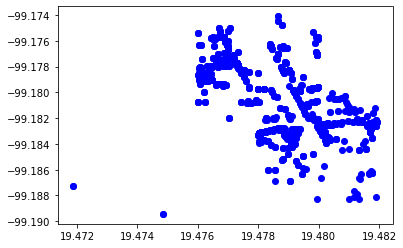

In [6]:
# map of the jobs
plot('blue')

In [7]:
# extract the relvent columns
dataset = np.array(df[['Latitude', 'Longitude']])

In [8]:
# verify the exctraction
dataset

array([[ 19.477986, -99.179773],
       [ 19.477644, -99.180817],
       [ 19.477986, -99.179773],
       ...,
       [ 19.476033, -99.178646],
       [ 19.476055, -99.178641],
       [ 19.476234, -99.178967]])

# PART 1 - KMEANS

In [9]:
# K to check for the KMeans
Ks = [k for k in range(4, 150)]

In [10]:
# execute KMeans for each K in Ks
inertia_lst = []
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=0)
    # fit the data
    _ = kmeans.fit_predict(dataset)
    # save inertia
    inertia_lst.append(kmeans.inertia_)

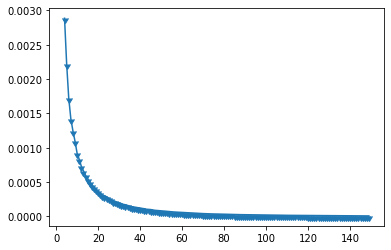

In [11]:
# plot inertia as function of number of clusers (k)
plt.plot(Ks, inertia_lst, marker=11)

finding the elbow is the method to find the best K. 
The solution is not optimal which means it is not return the best result any time.
In contrast, the result will be always close to the truth and the small error may not affect on our results drastically.

In [12]:
# finding the elbow
length = len(inertia_lst) - 1

# delta_1: index=0 -> #cluster=2 -> best_k_idx=1
delta_1 = [inertia_lst[i] - inertia_lst[i+1] for i in range(length)]

# delta_2: index 0 -> #cluster=3 -> best_k_idx=2
delta_2 = [delta_1[i] - delta_1[i+1] for i in range(length - 1)]

strength = [(i, delta_2[i+1] - delta_1[i+2]) for i in range(length - 2) if delta_1[i+1] >= 0 and delta_2[i+1] >= 0]

best_k_idx = max(strength,key=lambda t: t[1])[0] + 2
best_k = Ks[best_k_idx]

In [13]:
# get the best KMeans , n_clusters=best_k
best_kmeans = KMeans(n_clusters=best_k, random_state=0)

In [14]:
# seperate the instances to clusters

# get labels 
labels = best_kmeans.fit_predict(dataset)

# init dictionary
dict_of_clusters = {cluster: [] for cluster in range(best_k)}

for idx, instance in enumerate(dataset):
    dict_of_clusters[labels[idx]].append(instance)

In [15]:
# print cluster sizes
for cluster, instances in dict_of_clusters.items():
    print(f'------Cluster {cluster}: {len(instances)} jobs --------')
    print()

------Cluster 0: 99 jobs --------

------Cluster 1: 75 jobs --------

------Cluster 2: 129 jobs --------

------Cluster 3: 117 jobs --------

------Cluster 4: 51 jobs --------

------Cluster 5: 45 jobs --------

------Cluster 6: 93 jobs --------

------Cluster 7: 10 jobs --------

------Cluster 8: 31 jobs --------

------Cluster 9: 67 jobs --------

------Cluster 10: 2 jobs --------

------Cluster 11: 198 jobs --------

------Cluster 12: 54 jobs --------

------Cluster 13: 28 jobs --------

------Cluster 14: 39 jobs --------

------Cluster 15: 75 jobs --------

------Cluster 16: 37 jobs --------

------Cluster 17: 40 jobs --------

------Cluster 18: 10 jobs --------

------Cluster 19: 27 jobs --------

------Cluster 20: 72 jobs --------

------Cluster 21: 45 jobs --------

------Cluster 22: 7 jobs --------

------Cluster 23: 26 jobs --------

------Cluster 24: 13 jobs --------

------Cluster 25: 24 jobs --------

------Cluster 26: 2 jobs --------

------Cluster 27: 45 jobs --------

--

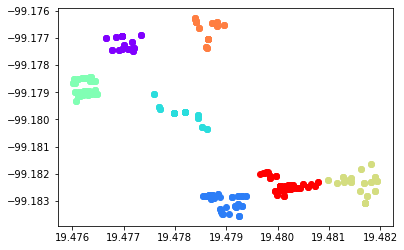

In [16]:
# plot the results
clusters = [c for c in range(best_k)]
colors = cm.rainbow(np.linspace(0, 1, Ks[3]))
for cluster, c in zip(clusters, colors):
    data = np.array(dict_of_clusters[cluster])
    plt.scatter(data[:, 0], data[:, 1], color=c)

# PART 2 - Order The Clusters 

In [17]:
# centers (centroids) of clusters
centers = best_kmeans.cluster_centers_

In [18]:
# radius of the Earth
R = 6373.0

def compute_distance(place_1, place_2):
    """
    compute the distance between two lat-long coordinates

    Input:

    place_1 - tuple : (latitude, longitude) of place 1
    place_2 - tuple : (latitude, longitude) of place 2

    Returns:
    distance - float number 
    """    
    
    distance_lat = place_2[0] - place_1[0]
    distance_long = place_2[1] - place_1[1]

    #Haverinse formula 
    x = math.sin(distance_lat / 2)**2 + math.cos(place_1[0]) * math.cos(place_2[0]) * math.sin(distance_long / 2)**2

    y = 2 * math.atan2(math.sqrt(x), math.sqrt(1 - x))

    return R * y

### 2a -
- Order the cluster according to the distances between them. 
- All data points in the same cluster will get the same index.

In [19]:
# order the clusters according to distance from cluster 0 

d_array = [(0,0)]
c_0 = centers[0]
for idx, c in enumerate(centers[1:]):
    d_array += [(compute_distance(c_0, c), idx + 1)]
cluster_distance = sorted(d_array, key=lambda x: x[0]) 

dict_cluster_to_idx = {c[1] : idx for idx, c in enumerate(cluster_distance)}

idx_res_column = []

# for each row add the relevent number according to the order of the clusters
for label in labels:
    idx_res_column += [dict_cluster_to_idx[label]]    

In [20]:
# add the column to the dataFrame
df['IDC_Index__c'] = idx_res_column

In [21]:
# craete result new excel
df.to_excel(f'results_{name_of_file}_(2a).xlsx', sheet_name='results')

### 2b - 
Order the cluters by executing shortest path algorithm on each cluster. 

In [22]:
# seprate the datapoints according to their cluster
# save id = job's row.
separate_dataset = [[] for cluster in range(best_k)]
id = 0
for datapoint, label in zip(dataset, labels):
    separate_dataset[label].append((id, datapoint))
    id += 1

Shoretest path Algorithm: 
### Dijkstra algorithm

- We execute SP on every cluster according to the order we achieved above.
- Fisrt iteration: 
    - Startpoint: take random datapoint
    - Endpoint: random datapoint from the next cluster
- Next iterations:
    - StartPoint: the endpoint from the previous iteration
    - Endpoint: random datapoint from the next cluster

In [23]:
# save the oredr of the clusters
cluster_order = [c[1] for c in cluster_distance]

In [24]:
MAX_VALUE = sys.float_info.max

In [25]:
class Vertex: 
    
    def __init__(self, job, is_root=False):
        self.id = job[0]
        self.place = job[1]
        self.distance = 0 if (is_root) else MAX_VALUE
        self.parent = None


    def relax(self, v):
        distance_from_self_to_v = compute_distance(self.place, v.place) 
        if v.distance > self.distance + distance_from_self_to_v:
            v.distance = self.distance + distance_from_self_to_v
            v.parent = self.id
            
    # implemt =, < for using heapq on vertex
    def __eq__(self, other):
        if self.distance == other.distance:
            return True
        else:
            return False

    def __lt__(self, other):
        if self.distance < other.distance:
            return True
        else:
            return False

In [26]:
idx = 0
results = []
for cluster in range(best_k):
    root = Vertex(separate_dataset[cluster][0], is_root=True)
    G = [Vertex(datapoint) for datapoint in separate_dataset[cluster][1:]]
    G.append(root)
    # we do not use E since there are edges between all the vertices
    #E = [(v1.id, v2.id) for v1 in G for v2 in G]

    # ------- Execute DIJKSTRA -------- #
    priority_queue = []
    #push all vertices
    for v in G:
        heapq.heappush(priority_queue, v)
    while priority_queue != []:
        # dequeue the smallest vertex (according to the distance field)
        u = heapq.heappop(priority_queue)
        results.append((u.id, idx)) #u.index = idx  ->. at Dijkstra the first to leave th queue is the closet to the begining
        for v in G:
            u.relax(v)
        idx +=1

In [27]:
#sort result according to rows order ('id')
results.sort(key=lambda row: row[0])
results = [row[1] for row in results]

In [28]:
# add the column to the dataFrame
df['IDC_Index__c'] = results

In [29]:
# craete result new excel
df.to_excel(f'results_{name_of_file}_(2b).xlsx', sheet_name='results')

### 2c -
- For each cluster perform Kmeans inside him and create sub-cluster
- Order the cluster according to the distances between them. 
- All data points in the same sub-cluster will get the same index.

In [107]:
df = pd.read_excel(f'results_real_data_(2a).xlsx')

In [108]:
# K to check for the KMeans
Ks = [k for k in range(2, 10)]

In [109]:
dict_of_clusters_2c = {}
index_2c = 0

for cluster in clusters:
    #todo
    dataset = dict_of_clusters[cluster]
    inertia_lst = []
    print(f'cluster : {cluster} length:  {len(dataset)}')
    if(len(dataset) > 10):
        for k in Ks:
            kmeans = KMeans(n_clusters=k, random_state=0)
            # fit the data
            _ = kmeans.fit_predict(dataset)
            # save inertia
            inertia_lst.append(kmeans.inertia_)
        # plot inertia as function of number of clusers (k)
    
        #print(plt.plot(Ks, inertia_lst, marker=11))
    
        # finding the elbow
        length = len(inertia_lst) - 1

        # delta_1: index=0 -> #cluster=2 -> best_k_idx=1
        delta_1 = [inertia_lst[i] - inertia_lst[i+1] for i in range(length)]

        # delta_2: index 0 -> #cluster=3 -> best_k_idx=2
        delta_2 = [delta_1[i] - delta_1[i+1] for i in range(length - 1)]

        strength = [(i, delta_2[i+1] - delta_1[i+2]) for i in range(length - 2) if delta_1[i+1] >= 0 and delta_2[i+1] >= 0]

        best_k_idx = max(strength,key=lambda t: t[1])[0] + 2
        best_k = Ks[best_k_idx]
    
        # get the best KMeans , n_clusters=best_k
        best_kmeans = KMeans(n_clusters=best_k, random_state=0)
    
        # seperate the instances to clusters

        # get labels 
        labels = best_kmeans.fit_predict(dataset)

        # init dictionary
        dict_of_clusters_2 = {cluster: [] for cluster in range(best_k)}

        for idx, instance in enumerate(dataset):
            dict_of_clusters_2[labels[idx]].append(instance)
        
        # print cluster sizes
        for cluster, instances in dict_of_clusters_2.items():
            #print(f'------Cluster {cluster}: {len(instances)} jobs --------')
            #print()
            dict_of_clusters_2c.update({index_2c: instances}) 
            index_2c += 1
        
        # centers (centroids) of clusters
        centers = best_kmeans.cluster_centers_
    
    else:
        dict_of_clusters_2c.update({index_2c: dataset}) 
        index_2c += 1
            
    
#print(centers)

cluster : 0 length:  99
cluster : 1 length:  75
cluster : 2 length:  129
cluster : 3 length:  117
cluster : 4 length:  51
cluster : 5 length:  45
cluster : 6 length:  93
cluster : 7 length:  10
cluster : 8 length:  31
cluster : 9 length:  67
cluster : 10 length:  2
cluster : 11 length:  198
cluster : 12 length:  54
cluster : 13 length:  28
cluster : 14 length:  39
cluster : 15 length:  75
cluster : 16 length:  37
cluster : 17 length:  40
cluster : 18 length:  10
cluster : 19 length:  27
cluster : 20 length:  72
cluster : 21 length:  45
cluster : 22 length:  7
cluster : 23 length:  26
cluster : 24 length:  13


C:\Users\yonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\yonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\yonat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


cluster : 25 length:  24
cluster : 26 length:  2
cluster : 27 length:  45
cluster : 28 length:  39


In [110]:
for cluster, instances in dict_of_clusters_2c.items():
    for instance in instances:
        inds = np.where(np.logical_and(df['Latitude'].values  == instance[0],df['Longitude'].values == instance[1]))[0]
        #print(np.logical_and(df['Latitude'].values  == instance[0],df['Longitude'].values == instance[1]))
        #print(inds)
        #print(instance, cluster)
        #print(df[['Latitude','Longitude']].iloc[inds])
        df['IDC_Index__c'].iloc[inds] = cluster
        #print(df['IDC_Index__c'].iloc[inds])

[  63  815 1474]
[ 19.476777 -99.177451] 0
[  64  817 1481]
[ 19.4769   -99.177427] 0
[  65  795 1478]
[ 19.476962 -99.177415] 0
[  65  795 1478]
[ 19.476962 -99.177415] 0
[  63  815 1474]
[ 19.476777 -99.177451] 0
[  64  817 1481]
[ 19.4769   -99.177427] 0
[  63  815 1474]
[ 19.476777 -99.177451] 0
[  65  795 1478]
[ 19.476962 -99.177415] 0
[  64  817 1481]
[ 19.4769   -99.177427] 0
[   8    9   25   26   27   28   29   30   31   32   54   56   59   71
   74  226  236  344  346  347  348  771  773  775  782  784  786  788
  789 1139 1140 1141 1146 1147 1148 1149 1150 1151 1152 1157 1158 1159
 1304 1306 1307 1308 1312 1395 1397 1398 1400 1413 1419 1420 1421 1423
 1487 1488 1489 1490 1491 1492 1493]
[ 19.47696 -99.17694] 1
[   8    9   25   26   27   28   29   30   31   32   54   56   59   71
   74  226  236  344  346  347  348  771  773  775  782  784  786  788
  789 1139 1140 1141 1146 1147 1148 1149 1150 1151 1152 1157 1158 1159
 1304 1306 1307 1308 1312 1395 1397 1398 1400 1413 1419

C:\Users\yonat\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)



[ 19.476067 -99.179312] 19
[ 497 1071 1191]
[ 19.476054 -99.179003] 19
[ 499 1079 1193]
[ 19.476102 -99.179129] 19
[ 501  516 1076 1177 1210 1441]
[ 19.476124 -99.179125] 19
[ 503 1095 1212]
[ 19.476147 -99.17912 ] 19
[ 501  516 1076 1177 1210 1441]
[ 19.476124 -99.179125] 19
[ 390  518 1103 1179 1256 1445]
[ 19.476169 -99.179116] 19
[ 392  520 1100 1182 1209 1449]
[ 19.476144 -99.178985] 19
[ 435  534 1284]
[ 19.476067 -99.179312] 19
[ 302 1068 1184]
[ 19.476212 -99.178971] 19
[ 497 1071 1191]
[ 19.476054 -99.179003] 19
[ 501  516 1076 1177 1210 1441]
[ 19.476124 -99.179125] 19
[ 499 1079 1193]
[ 19.476102 -99.179129] 19
[ 268 1092 1254]
[ 19.476122 -99.178989] 19
[ 503 1095 1212]
[ 19.476147 -99.17912 ] 19
[ 392  520 1100 1182 1209 1449]
[ 19.476144 -99.178985] 19
[ 390  518 1103 1179 1256 1445]
[ 19.476169 -99.179116] 19
[ 294 1122 1137]
[ 19.476214 -99.179107] 19
[ 270  292 1127 1170 1224 1435]
[ 19.476167 -99.17898 ] 19
[ 282 1129 1499]
[ 19.476234 -99.178967] 19
[ 284 1131 1437]

[  99  708 1346]
[ 19.479774 -99.179674] 44
[ 116  710 1371]
[ 19.479736 -99.179822] 44
[ 115  709 1373]
[ 19.479672 -99.179702] 44
[1310]
[ 19.480436 -99.180065] 45
[85]
[ 19.479421 -99.179423] 46
[92]
[ 19.479452 -99.179414] 46
[340 360]
[ 19.47486 -99.18943] 47
[340 360]
[ 19.47486 -99.18943] 47
[202 904]
[ 19.478167 -99.183084] 48
[ 361  730  903 1389]
[ 19.478204 -99.183067] 48
[362 920]
[ 19.478214 -99.183061] 48
[ 444  764  933 1321]
[ 19.478149 -99.18309 ] 48
[445 905]
[ 19.478159 -99.183086] 48
[507 959]
[ 19.478224 -99.183055] 48
[508 554 966 981]
[ 19.478225 -99.183055] 48
[509 960]
[ 19.478228 -99.183052] 48
[ 514  688  906 1343]
[ 19.478198 -99.183071] 48
[515 919]
[ 19.478201 -99.183069] 48
[508 554 966 981]
[ 19.478225 -99.183055] 48
[555 979]
[ 19.478208 -99.183065] 48
[572 986]
[ 19.478246 -99.183039] 48
[ 599  750  874 1320]
[ 19.478156 -99.183088] 48
[600 975]
[ 19.478174 -99.183082] 48
[602 875]
[ 19.478181 -99.18308 ] 48
[604 977]
[ 19.478185 -99.183078] 48
[617 97

[ 356 1093 1217]
[ 19.479078 -99.178481] 69
[ 356 1093 1217]
[ 19.479078 -99.178481] 69
[ 356 1093 1217]
[ 19.479078 -99.178481] 69
[ 240  765 1428]
[ 19.4769   -99.177964] 70
[ 349  766 1426]
[ 19.476961 -99.177952] 70
[ 350  767 1391]
[ 19.476937 -99.177821] 70
[ 351  768 1387]
[ 19.477023 -99.177939] 70
[ 240  765 1428]
[ 19.4769   -99.177964] 70
[ 349  766 1426]
[ 19.476961 -99.177952] 70
[ 350  767 1391]
[ 19.476937 -99.177821] 70
[ 351  768 1387]
[ 19.477023 -99.177939] 70
[ 351  768 1387]
[ 19.477023 -99.177939] 70
[ 350  767 1391]
[ 19.476937 -99.177821] 70
[ 349  766 1426]
[ 19.476961 -99.177952] 70
[ 240  765 1428]
[ 19.4769   -99.177964] 70
[ 243 1096 1242]
[ 19.47735 -99.17817] 71
[ 260 1204 1463]
[ 19.477434 -99.17837 ] 71
[ 262 1288 1462]
[ 19.47733 -99.17807] 71
[ 303  414 1067 1228 1234 1446]
[ 19.47753 -99.17828] 71
[ 401  577 1291]
[ 19.477387 -99.178163] 71
[ 303  414 1067 1228 1234 1446]
[ 19.47753 -99.17828] 71
[ 482 1186 1450]
[ 19.47744 -99.1785 ] 71
[ 401  577 1

[301 505 864]
[ 19.481323 -99.184459] 107
[301 505 864]
[ 19.481323 -99.184459] 107
[ 124  439 1275]
[ 19.481774 -99.18354 ] 108
[ 124  439 1275]
[ 19.481774 -99.18354 ] 108
[ 124  439 1275]
[ 19.481774 -99.18354 ] 108
[865]
[ 19.480761 -99.184495] 109
[856]
[ 19.481011 -99.184384] 110
[208 319 868]
[ 19.481568 -99.184387] 111
[208 319 868]
[ 19.481568 -99.184387] 111
[208 319 868]
[ 19.481568 -99.184387] 111
[1274]
[ 19.481475 -99.18397 ] 112
[128 199 201 910 936]
[ 19.479956 -99.177066] 113
[128 199 201 910 936]
[ 19.479956 -99.177066] 113
[128 199 201 910 936]
[ 19.479956 -99.177066] 113
[468 758 893]
[ 19.479946 -99.176982] 113
[ 478  584 1262]
[ 19.479948 -99.177003] 113
[ 478  584 1262]
[ 19.479948 -99.177003] 113
[468 758 893]
[ 19.479946 -99.176982] 113
[468 758 893]
[ 19.479946 -99.176982] 113
[128 199 201 910 936]
[ 19.479956 -99.177066] 113
[128 199 201 910 936]
[ 19.479956 -99.177066] 113
[ 478  584 1262]
[ 19.479948 -99.177003] 113
[417 925]
[ 19.47992 -99.17569] 114
[ 475

In [111]:
# craete result new excel
df.to_excel(f'results_{name_of_file}_(2c).xlsx', sheet_name='results')

In [112]:
df

,Unnamed: 0,_,Id,AppointmentNumber,Latitude,Longitude,IDC_Index__c
0,0,[ServiceAppointment],08p4L000000lJU2QAM,SA-2548,19.477986,-99.179773,14
1,1,[ServiceAppointment],08p4L000000lJU3QAM,SA-2549,19.477644,-99.180817,87
2,2,[ServiceAppointment],08p4L000000lJU4QAM,SA-2550,19.477986,-99.179773,14
3,3,[ServiceAppointment],08p4L000000lJU5QAM,SA-2551,19.477956,-99.180741,89
4,4,[ServiceAppointment],08p4L000000lJU6QAM,SA-2552,19.477986,-99.179773,14
...,...,...,...,...,...,...,...
1495,1495,[ServiceAppointment],08p4L000000lJlvQAE,SA-3657,19.476123,-99.176299,55
1496,1496,[ServiceAppointment],08p4L000000lJlxQAE,SA-3659,19.476011,-99.178650,20
1497,1497,[ServiceAppointment],08p4L000000lJlwQAE,SA-3658,19.476033,-99.178646,20
1498,1498,[ServiceAppointment],08p4L000000lJlyQAE,SA-3660,19.476055,-99.178641,20
